In [1]:
import jax.numpy as np
import numpy as onp
import jax
jax.config.update("jax_enable_x64", True)

In [2]:
n = 2

In [3]:
m = 3

In [4]:
a = onp.random.normal(0,1,[m,n])
b = np.abs(onp.random.normal(0,1,[m]))

In [5]:
x = np.zeros(n)

In [6]:
def f(x):
    return - np.sum(np.log(1-x**2))  - np.sum(np.log( b - a@x))

In [7]:
from jax import grad,hessian

grad_f = grad(f)
hessian_f = hessian(f)

In [8]:
# fixed step size gradient descent

In [9]:
eps = 0.1

trace_x = []

x = np.zeros(n)
nabla =  grad_f(x)
while np.linalg.norm(nabla)>1E-3:
    trace_x.append(x)
    x = x - eps*nabla
    nabla =  grad_f(x)

In [10]:
import pylab as plt

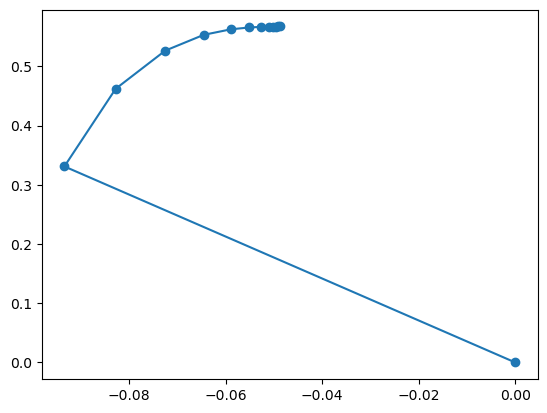

In [11]:
trace_x = np.vstack(trace_x)
plt.scatter(trace_x[:,0],trace_x[:,1])
plt.plot(trace_x[:,0],trace_x[:,1])

In [12]:
# fixed step size Newton's method

In [13]:
eps = 0.5

trace_x = []

x = np.zeros(n)
nabla =  grad_f(x)
nabla2 =  hessian_f(x)
newton_step = - np.linalg.solve(nabla2,nabla)
decrement = -nabla.T@newton_step

while decrement>1E-3:
    trace_x.append(x)
    
    x = x + eps*newton_step

    nabla =  grad_f(x)
    nabla2 =  hessian_f(x)
    newton_step = - np.linalg.solve(nabla2,nabla)
    decrement = -nabla.T@newton_step    

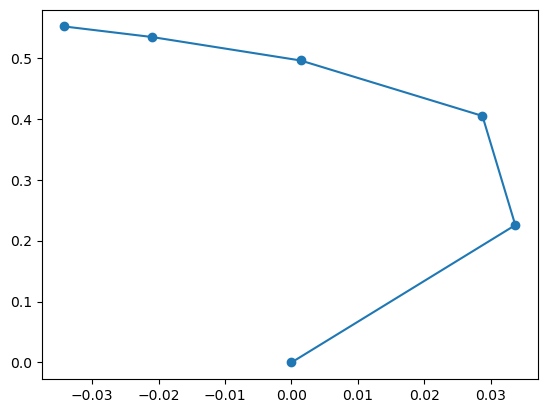

In [14]:
trace_x = np.vstack(trace_x)
plt.scatter(trace_x[:,0],trace_x[:,1])
plt.plot(trace_x[:,0],trace_x[:,1])